In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d utkarshsaxenadn/fast-food-classification-dataset
!unzip fast-food-classification-dataset.zip -d fast_food_data


Streaming output truncated to the last 5000 lines.
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (1).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (10).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (100).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (1000).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (1001).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (1002).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (1003).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (1004).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taquito-Train (1005).jpeg  
  inflating: fast_food_data/Fast Food Classification V2/Train/Taquito/Taq

In [ ]:
import os

for root, dirs, files in os.walk("fast_food_data"):
    level = root.replace("fast_food_data", "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 2 * (level + 1)
    for f in files[:5]:
        print(f"{subindent}{f}")


fast_food_data/
  Fast Food Classification V2/
    Valid/
      Taquito/
        Taquito-Valid (313).jpeg
        Taquito-Valid (116).jpeg
        Taquito-Valid (366).jpeg
        Taquito-Valid (360).jpeg
        Taquito-Valid (352).jpeg
      Baked Potato/
        Baked Potato-Valid (61).jpeg
        Baked Potato-Valid (387).jpeg
        Baked Potato-Valid (262).jpeg
        Baked Potato-Valid (79).jpeg
        Baked Potato-Valid (251).jpeg
      Fries/
        Fries-Valid (246).jpeg
        Fries-Valid (287).jpeg
        Fries-Valid (34).jpeg
        Fries-Valid (385).jpeg
        Fries-Valid (142).jpeg
      Donut/
        Donut-Valid (35).jpeg
        Donut-Valid (286).jpeg
        Donut-Valid (136).jpeg
        Donut-Valid (195).jpeg
        Donut-Valid (279).jpeg
      Burger/
        Burger-Valid (183).jpeg
        Burger-Valid (120).jpeg
        Burger-Valid (266).jpeg
        Burger-Valid (110).jpeg
        Burger-Valid (16).jpeg
      Taco/
        Taco-Valid (259).jpeg
     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'fast_food_data/Fast Food Classification V2/Train'
val_dir = 'fast_food_data/Fast Food Classification V2/Valid'

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)


Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.1458 - loss: 2.7123 - val_accuracy: 0.1826 - val_loss: 2.3250
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.2040 - loss: 2.2660 - val_accuracy: 0.1849 - val_loss: 2.2096
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.2250 - loss: 2.1855 - val_accuracy: 0.2360 - val_loss: 2.1155
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.2477 - loss: 2.1239 - val_accuracy: 0.2563 - val_loss: 2.1291
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.2619 - loss: 2.0795 - val_accuracy: 0.2431 - val_loss: 2.1464
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.2589 - loss: 2.0704 - val_accuracy: 0.2531 - val_loss: 2.1122
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.2641 - loss: 2.0539 - val_accuracy: 0.2746 - val_loss: 2.0535
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.2713 - loss: 2.0368 - 

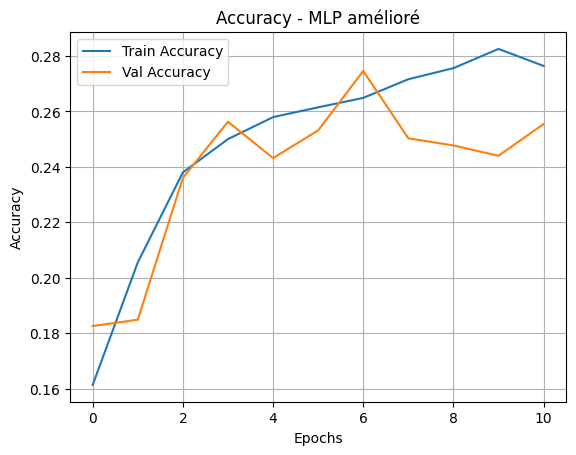

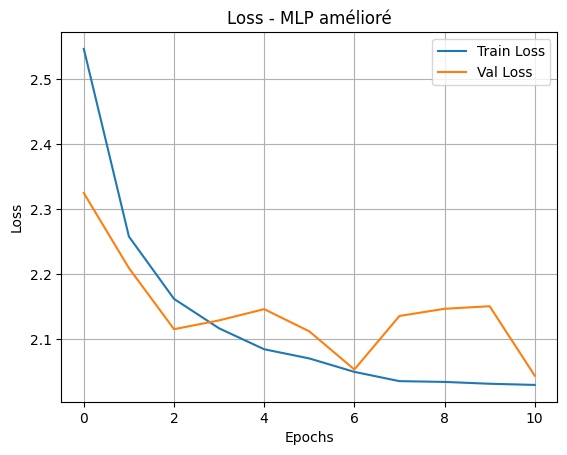

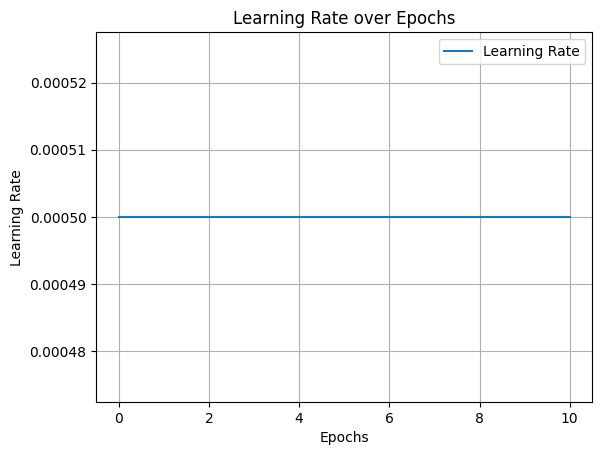

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

class LrHistory(Callback):
    def on_train_begin(self, logs=None):
        self.lrs = []
    def on_epoch_end(self, epoch, logs=None):
        self.lrs.append(float(self.model.optimizer.learning_rate.numpy()))

lr_history = LrHistory()

model = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=RMSprop(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stop, lr_history]
)

acc_train = history.history['accuracy'][-1]
acc_val = history.history['val_accuracy'][-1]
loss_train = history.history['loss'][-1]
loss_val = history.history['val_loss'][-1]

print(" Résultats du modèle MLP:")
print(f"Accuracy entraînement = {acc_train:.2%}")
print(f"Accuracy validation   = {acc_val:.2%}")
print(f"Loss entraînement     = {loss_train:.4f}")
print(f"Loss validation       = {loss_val:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy - MLP amélioré')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss - MLP amélioré')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(lr_history.lrs, label='Learning Rate')
plt.title('Learning Rate over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


Le modèle **MLP** présenté montre des performances faibles (**accuracy < 30 %**), ce qui indique un **underfitting** : le réseau n'arrive pas à bien apprendre les données, malgré une architecture correcte. Pour y remédier, plusieurs techniques ont été appliquées :

- **BatchNormalization** : pour stabiliser et accélérer l'entraînement.
- **Dropout** : pour réduire le risque d’overfitting en désactivant aléatoirement des neurones.
- **EarlyStopping** : pour arrêter l’entraînement si la validation n’améliore plus, évitant le surapprentissage.
- **Taux d’apprentissage réduit (0.0005)** : pour assurer une convergence plus stable.


Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - accuracy: 0.1630 - loss: 2.5478 - val_accuracy: 0.2303 - val_loss: 2.1382
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.2532 - loss: 2.0930 - val_accuracy: 0.2689 - val_loss: 2.0030
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 131ms/step - accuracy: 0.2977 - loss: 1.9819 - val_accuracy: 0.2834 - val_loss: 2.1144
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.3363 - loss: 1.8939 - val_accuracy: 0.3454 - val_loss: 1.8761
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 137ms/step - accuracy: 0.3623 - loss: 1.8261 - val_accuracy: 0.3977 - val_loss: 1.7829
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 138ms/step - accuracy: 0.3806 - loss: 1.7871 - val_accuracy: 0.3026 - val_loss: 1.9347
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.4127 - loss: 1.7389 - val_accuracy: 0.4466 - val_loss: 1.6571
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.4276 - loss: 1

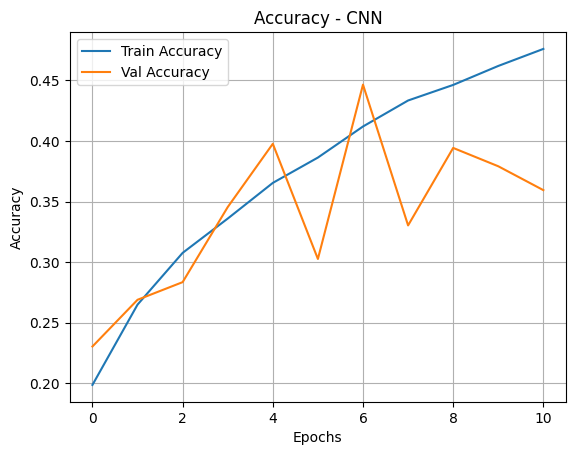

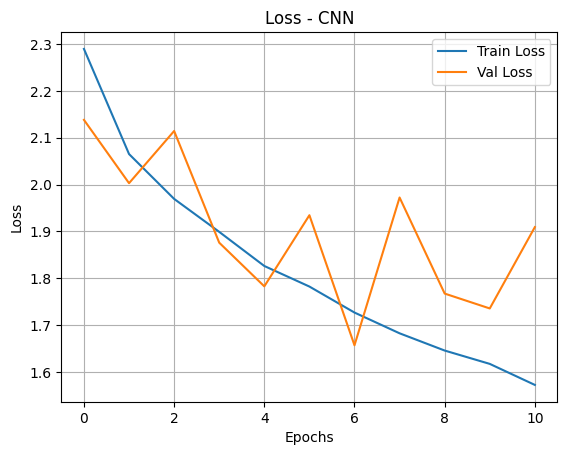

Found 3500 images belonging to 10 classes.
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


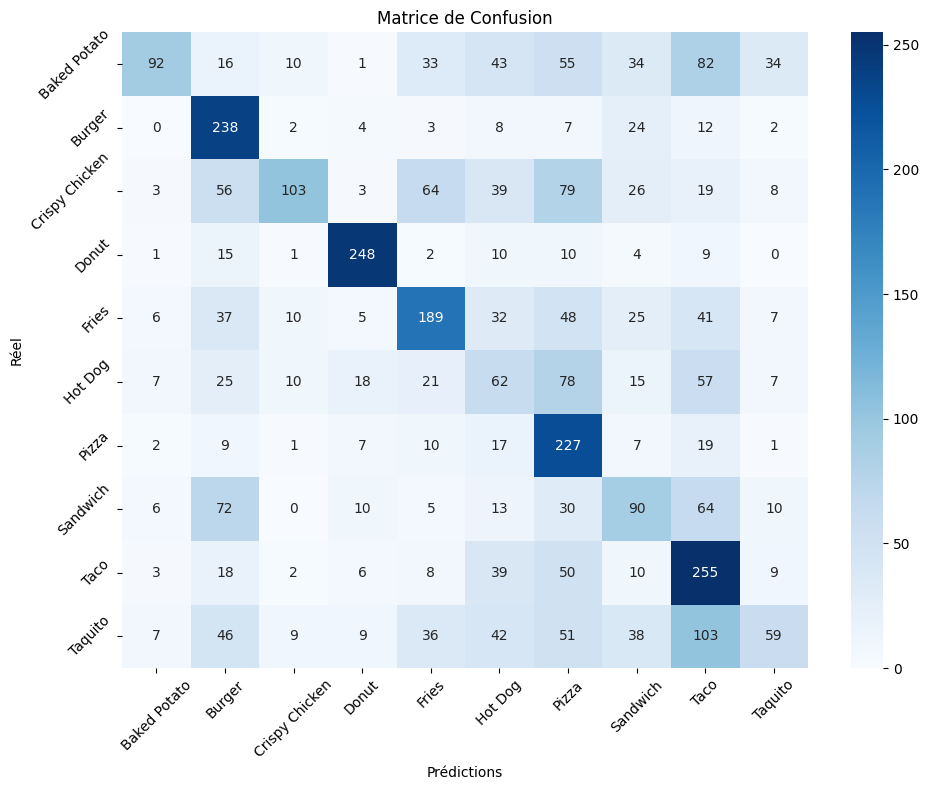

Classification Report :
                precision    recall  f1-score   support

  Baked Potato       0.72      0.23      0.35       400
        Burger       0.45      0.79      0.57       300
Crispy Chicken       0.70      0.26      0.38       400
         Donut       0.80      0.83      0.81       300
         Fries       0.51      0.47      0.49       400
       Hot Dog       0.20      0.21      0.20       300
         Pizza       0.36      0.76      0.49       300
      Sandwich       0.33      0.30      0.31       300
          Taco       0.39      0.64      0.48       400
       Taquito       0.43      0.15      0.22       400

      accuracy                           0.45      3500
     macro avg       0.49      0.46      0.43      3500
  weighted avg       0.50      0.45      0.42      3500



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

train_dir = 'fast_food_data/Fast Food Classification V2/Train'
val_dir = 'fast_food_data/Fast Food Classification V2/Valid'

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen_val.flow_from_directory(
    val_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stop]
)

acc_train = history.history['accuracy'][-1]
acc_val = history.history['val_accuracy'][-1]
loss_train = history.history['loss'][-1]
loss_val = history.history['val_loss'][-1]

print("Résultats du modèle CNN:")
print(f"Accuracy entraînement = {acc_train:.2%}")
print(f"Accuracy validation   = {acc_val:.2%}")
print(f"Loss entraînement     = {loss_train:.4f}")
print(f"Loss validation       = {loss_val:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy - CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss - CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

val_generator_for_preds = datagen_val.flow_from_directory(
    val_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

y_true = val_generator_for_preds.classes
y_pred_probs = model.predict(val_generator_for_preds)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)
labels = list(val_generator_for_preds.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

print("Classification Report :")
print(classification_report(y_true, y_pred, target_names=labels))


Le modèle **CNN** atteint **47.61 %** en entraînement et **35.94 %** en validation, indiquant un léger **overfitting**. Pour améliorer la généralisation, plusieurs techniques ont été utilisées :

- **Data augmentation** : pour enrichir les données.
- **BatchNormalization** : pour stabiliser l’entraînement.
- **Dropout** : pour limiter l’overfitting.
- **EarlyStopping** : pour éviter l’apprentissage excessif.
- **Taux d’apprentissage réduit** : pour une convergence plus fine.

Ces choix ont permis d’obtenir de meilleurs résultats.


Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
132/469 ━━━━━━━━━━━━━━━━━━━━ 9:51 2s/step - accuracy: 0.2346 - loss: 2.3720

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 1008s 2s/step - accuracy: 0.4004 - loss: 1.8317 - val_accuracy: 0.7146 - val_loss: 0.9456
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1044s 2s/step - accuracy: 0.6692 - loss: 1.0235 - val_accuracy: 0.7360 - val_loss: 0.8726
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 979s 2s/step - accuracy: 0.6955 - loss: 0.9277 - val_accuracy: 0.7391 - val_loss: 0.8502
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 983s 2s/step - accuracy: 0.7104 - loss: 0.8794 - val_accuracy: 0.7417 - val_loss: 0.8466
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1022s 2s/step - accuracy: 0.7318 - loss: 0.8207 - val_accuracy: 0.7569 - val_loss: 0.8095
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1041s 2s/step - accuracy: 0.7345 - loss: 0.8162 - val_accuracy: 0.7506 - val_loss: 0.8009
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1051s 2s/step - accuracy: 0.7431 - loss: 0.7925 - val_accuracy: 0.7611 - val_loss: 0.7838
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1038s 2s/step - accuracy: 0.7444 - loss: 0.7933 - val_accuracy:

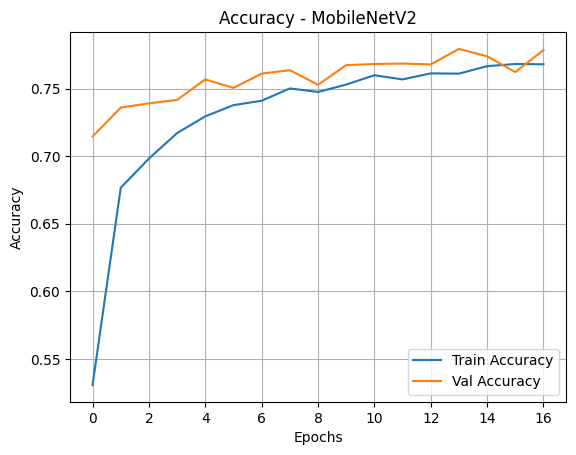

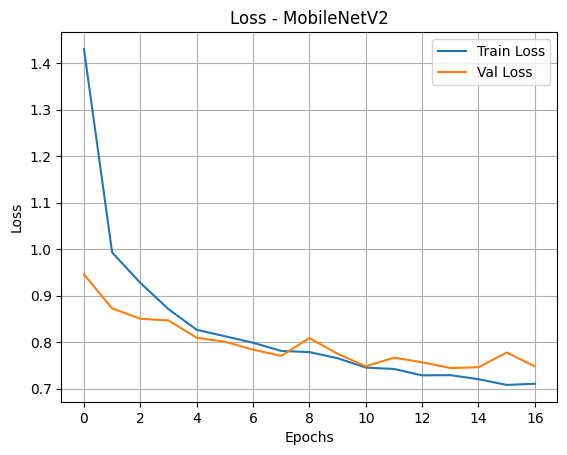

Found 3500 images belonging to 10 classes.
110/110 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step


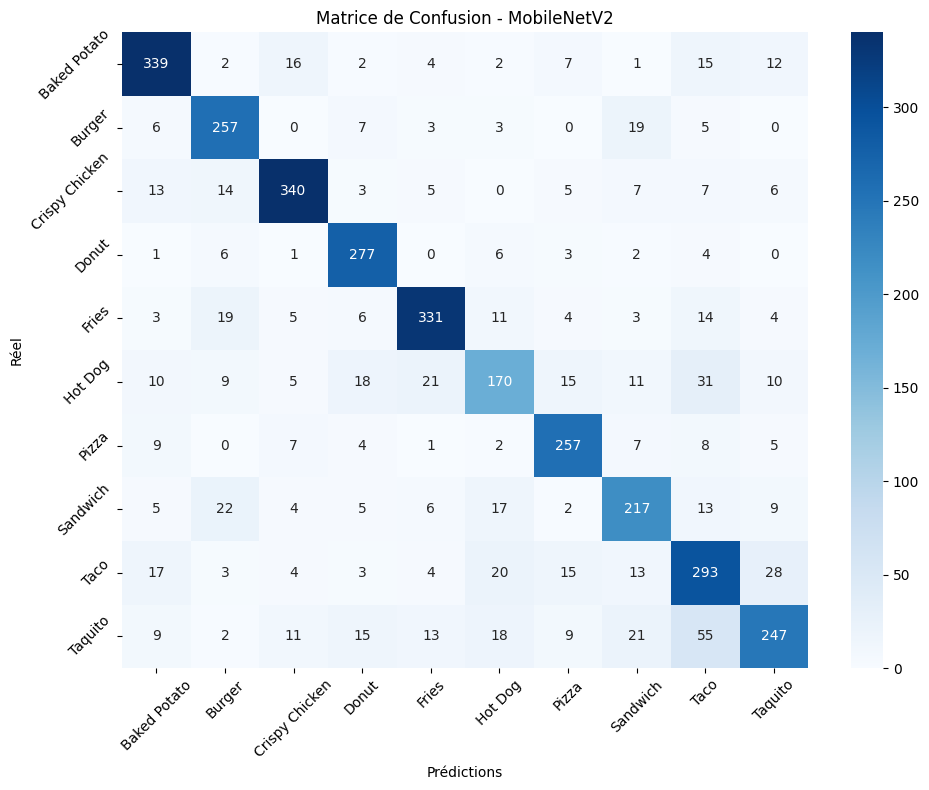

Classification Report :
                precision    recall  f1-score   support

  Baked Potato       0.82      0.85      0.83       400
        Burger       0.77      0.86      0.81       300
Crispy Chicken       0.87      0.85      0.86       400
         Donut       0.81      0.92      0.87       300
         Fries       0.85      0.83      0.84       400
       Hot Dog       0.68      0.57      0.62       300
         Pizza       0.81      0.86      0.83       300
      Sandwich       0.72      0.72      0.72       300
          Taco       0.66      0.73      0.69       400
       Taquito       0.77      0.62      0.69       400

      accuracy                           0.78      3500
     macro avg       0.78      0.78      0.78      3500
  weighted avg       0.78      0.78      0.78      3500



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

train_dir = 'fast_food_data/Fast Food Classification V2/Train'
val_dir = 'fast_food_data/Fast Food Classification V2/Valid'

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen_val.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stop]
)

acc_train = history.history['accuracy'][-1]
acc_val = history.history['val_accuracy'][-1]
loss_train = history.history['loss'][-1]
loss_val = history.history['val_loss'][-1]

print("Résultats du modèle Transfer Learning:")
print(f"Accuracy entraînement = {acc_train:.2%}")
print(f"Accuracy validation   = {acc_val:.2%}")
print(f"Loss entraînement     = {loss_train:.4f}")
print(f"Loss validation       = {loss_val:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy - MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss - MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

val_generator_for_preds = datagen_val.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

y_true = val_generator_for_preds.classes
y_pred_probs = model.predict(val_generator_for_preds)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)
labels = list(val_generator_for_preds.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matrice de Confusion - MobileNetV2")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

print("Classification Report :")
print(classification_report(y_true, y_pred, target_names=labels))


Le modèle basé sur **MobileNetV2** montre une amélioration significative
 atteignant une accuracy de validation de **77,86 %** .

Cela illustre bien l'intérêt du **transfer learning**, qui permet de bénéficier des connaissances apprises sur un grand dataset (*ImageNet*) pour mieux généraliser sur un jeu de données plus restreint.

De plus, le modèle converge rapidement, avec des pertes relativement faibles, ce qui confirme l’efficacité de cette approche pour des tâches de classification d’images complexes.


In [ ]:
!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

train_dir = 'fast_food_data/Fast Food Classification V2/Train'
val_dir = 'fast_food_data/Fast Food Classification V2/Valid'

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen_val = ImageDataGenerator(rescale=1./255)

# Générateurs
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
validation_generator = datagen_val.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  5/469 ━━━━━━━━━━━━━━━━━━━━ 26:41 3s/step - accuracy: 0.0970 - loss: 3.3971

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 1381s 3s/step - accuracy: 0.4309 - loss: 1.7369 - val_accuracy: 0.7246 - val_loss: 0.9394
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1358s 3s/step - accuracy: 0.8012 - loss: 0.6400 - val_accuracy: 0.7683 - val_loss: 0.8830
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1324s 3s/step - accuracy: 0.8427 - loss: 0.4939 - val_accuracy: 0.8089 - val_loss: 0.7279
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1317s 3s/step - accuracy: 0.8814 - loss: 0.3881 - val_accuracy: 0.8109 - val_loss: 0.7534
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1322s 3s/step - accuracy: 0.8944 - loss: 0.3390 - val_accuracy: 0.8249 - val_loss: 0.6668
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1344s 3s/step - accuracy: 0.9102 - loss: 0.2793 - val_accuracy: 0.8140 - val_loss: 0.7726
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1384s 3s/step - accuracy: 0.9232 - loss: 0.2368 - val_accuracy: 0.8411 - val_loss: 0.6153
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1375s 3s/step - accuracy: 0.9372 - loss: 0.1959 - val_accurac

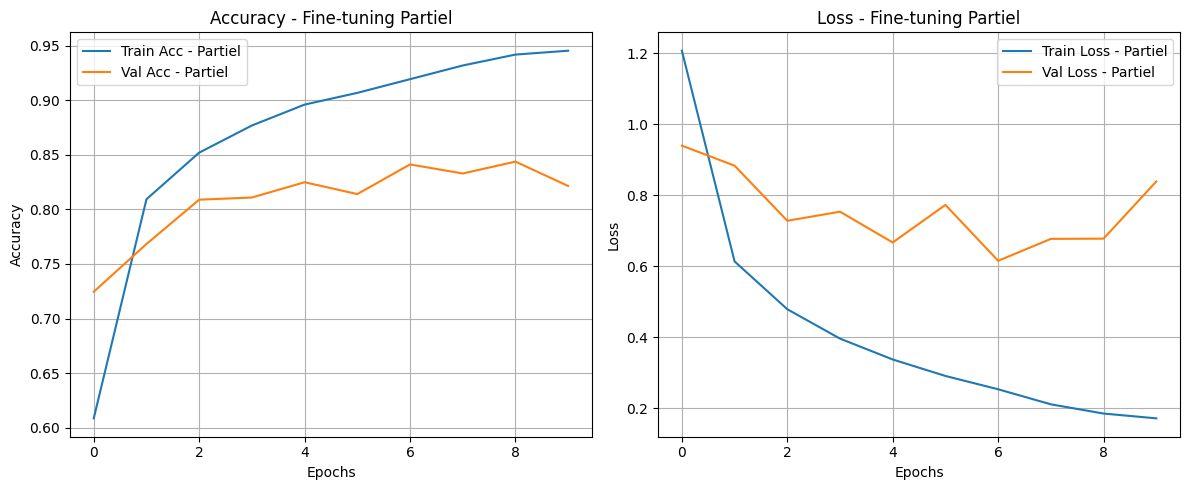

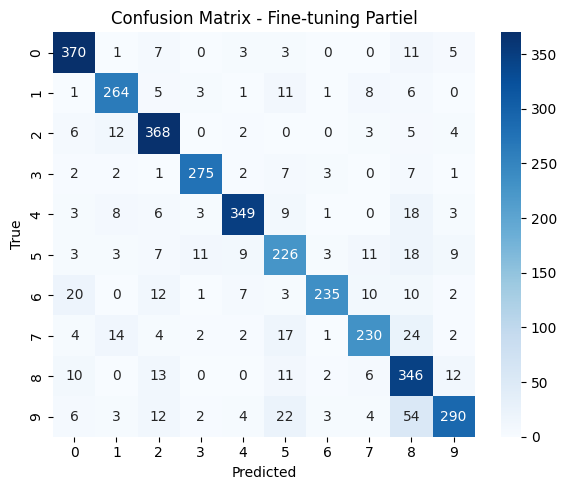

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model_partiel = Model(inputs=base_model.input, outputs=predictions)

model_partiel.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_partiel = model_partiel.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop]
)

val_generator_for_preds = datagen_val.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

y_true = val_generator_for_preds.classes
y_pred_probs = model_partiel.predict(val_generator_for_preds)
y_pred = np.argmax(y_pred_probs, axis=1)
cm_partiel = confusion_matrix(y_true, y_pred)
report_partiel = classification_report(y_true, y_pred, output_dict=True)

acc_train_partiel = history_partiel.history['accuracy'][-1]
acc_val_partiel = history_partiel.history['val_accuracy'][-1]
loss_train_partiel = history_partiel.history['loss'][-1]
loss_val_partiel = history_partiel.history['val_loss'][-1]

print("Résultats du modèle Transfer Learning (partiel) :")
print(f"Accuracy entraînement = {acc_train_partiel:.2%}")
print(f"Accuracy validation   = {acc_val_partiel:.2%}")
print(f"Loss entraînement     = {loss_train_partiel:.4f}")
print(f"Loss validation       = {loss_val_partiel:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_partiel.history['accuracy'], label='Train Acc - Partiel')
plt.plot(history_partiel.history['val_accuracy'], label='Val Acc - Partiel')
plt.title("Accuracy - Fine-tuning Partiel")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_partiel.history['loss'], label='Train Loss - Partiel')
plt.plot(history_partiel.history['val_loss'], label='Val Loss - Partiel')
plt.title("Loss - Fine-tuning Partiel")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_partiel, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Fine-tuning Partiel")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

train_dir = 'fast_food_data/Fast Food Classification V2/Train'
val_dir = 'fast_food_data/Fast Food Classification V2/Valid'

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen_val = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
validation_generator = datagen_val.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model_complet = Model(inputs=base_model.input, outputs=predictions)

model_complet.compile(optimizer=Adam(learning_rate=0.00001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_complet = model_complet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop]
)

y_pred_probs_c = model_complet.predict(validation_generator)
y_pred_c = np.argmax(y_pred_probs_c, axis=1)
y_true = validation_generator.classes

cm_complet = confusion_matrix(y_true, y_pred_c)
report_complet = classification_report(y_true, y_pred_c, output_dict=True)

acc_train_complet = history_complet.history['accuracy'][-1]
acc_val_complet = history_complet.history['val_accuracy'][-1]
loss_train_complet = history_complet.history['loss'][-1]
loss_val_complet = history_complet.history['val_loss'][-1]

print("Résultats du modèle Transfer Learning (complet) :")
print(f"Accuracy entraînement = {acc_train_complet:.2%}")
print(f"Accuracy validation   = {acc_val_complet:.2%}")
print(f"Loss entraînement     = {loss_train_complet:.4f}")
print(f"Loss validation       = {loss_val_complet:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_complet.history['accuracy'], label='Train Acc - Complet')
plt.plot(history_complet.history['val_accuracy'], label='Val Acc - Complet')
plt.title("Accuracy - Fine-tuning Complet")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_complet.history['loss'], label='Train Loss - Complet')
plt.plot(history_complet.history['val_loss'], label='Val Loss - Complet')
plt.title("Loss - Fine-tuning Complet")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_complet, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Fine-tuning Complet")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
122/469 ━━━━━━━━━━━━━━━━━━━━ 40:17 7s/step - accuracy: 0.0984 - loss: 3.0717

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 3513s 7s/step - accuracy: 0.1356 - loss: 2.7599 - val_accuracy: 0.4277 - val_loss: 1.8053
Epoch 2/10
 26/469 ━━━━━━━━━━━━━━━━━━━━ 53:49 7s/step - accuracy: 0.3024 - loss: 2.0192

###Partie 3 : Transfer Learning :Comparaison Fine-Tuning Partiel vs Complet


### Partiel
- **Validation accuracy** : 82.14 %
- **Validation loss** : 0.8386
-  Entraînement plus rapide  
-  Moins adapté aux spécificités du dataset (surapprentissage possible)

### Complet
- **Validation accuracy** : 87.50 %
- **Validation loss** : 0.3883
-  Meilleure généralisation  
-  Entraînement plus long

---

##  Conclusion
Le **fine-tuning complet** offre les **meilleurs résultats**, car il permet au modèle de s’adapter pleinement aux données. Le **partiel** reste une option plus rapide, mais souvent moins performante.


# Partie 4 : Comparaison des trois méthodes  Comparaison des Trois Modèles sur le Dataset Fast Food

### 1. **MLP (Multi-Layer Perceptron)**

- **Performance** : Accuracy < 30 %, malgré les techniques de régularisation (BatchNorm, Dropout, EarlyStopping).
- **Limitation** : Ne prend pas en compte la structure spatiale des images, chaque pixel est traité indépendamment.
- **Conclusion** : Inadapté pour les images. Convient plutôt aux données tabulaires ou aux usages pédagogiques.

---

### 2. **CNN personnalisé**

- **Performance** :
  - Accuracy entraînement ≈ 47,61 %
  - Accuracy validation ≈ 35,94 %
- **Techniques utilisées** :
  - Data Augmentation (rotation, translation, flip)
  - BatchNormalization
  - Dropout
  - EarlyStopping
  - Learning rate réduit (0.0005)
- **Observation** : Le modèle apprend les données d’entraînement mais généralise mal (overfitting léger).
- **Conclusion** : Meilleur que le MLP, mais encore limité sans architecture plus profonde ni plus de données.

---

### 3. **Transfer Learning avec MobileNetV2**

- **Performance** :
  - Accuracy entraînement ≈ 76,81 %
  - Accuracy validation ≈ **77,86 %**
- **Forces** :
  - Utilisation d’un modèle pré-entraîné sur ImageNet
  - Excellente capacité de généralisation
  - Convergence rapide, pertes faibles
- **Faiblesses** :
  - Moins de flexibilité pour adapter l’architecture
  - Moins efficace si le domaine est trop éloigné d’ImageNet
- **Conclusion** : Meilleure approche testée, idéale pour petits datasets d’images complexes.

---

##  Conclusion Générale

- **MLP** : Trop faible, inadapté à la vision par ordinateur.
- **CNN** : Meilleure extraction de caractéristiques, mais nécessite des ajustements pour mieux généraliser.
- **MobileNetV2 (Transfer Learning)** : Offre les **meilleures performances**, rapide, efficace, et bien adapté aux tâches de classification avec peu de données.

> **Recommandation** : Utiliser le Transfer Learning (comme MobileNetV2) pour ce type de problème est la solution la plus fiable et efficace.
